In [1]:
import numpy as np
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train.shape, y_train.shape

Using TensorFlow backend.


11476992/11490434 [============================>.] - ETA: 0s

((60000, 28, 28), (60000,))

In [2]:
x_train = x_train.reshape((-1,28,28,1))
x_test = x_test.reshape((-1,28,28,1))
x_train.shape, y_train.shape

((60000, 28, 28, 1), (60000,))

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, Flatten, MaxPool2D

model = Sequential()
model.add(Conv2D(32, 3, activation='relu', padding='same', input_shape=(28,28,1)))
model.add(MaxPool2D())
model.add(Conv2D(32, 3, activation='relu', padding='same'))
model.add(MaxPool2D())
model.add(Conv2D(32, 3, activation='relu', padding='same'))
model.add(MaxPool2D())
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 7, 7, 32)          9248      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 3, 3, 32)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 288)               0         
__________

In [9]:
hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20, batch_size=2048)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 1s - loss: 5.6055 - acc: 0.4733 - val_loss: 1.6380 - val_acc: 0.7104
Epoch 2/20
60000/60000 [==============================] - 0s - loss: 0.6824 - acc: 0.8024 - val_loss: 0.3084 - val_acc: 0.9052
Epoch 3/20
60000/60000 [==============================] - 0s - loss: 0.2523 - acc: 0.9227 - val_loss: 0.1852 - val_acc: 0.9441
Epoch 4/20
60000/60000 [==============================] - 0s - loss: 0.1686 - acc: 0.9476 - val_loss: 0.1440 - val_acc: 0.9547
Epoch 5/20
60000/60000 [==============================] - 0s - loss: 0.1290 - acc: 0.9599 - val_loss: 0.1163 - val_acc: 0.9648
Epoch 6/20
60000/60000 [==============================] - 0s - loss: 0.1024 - acc: 0.9680 - val_loss: 0.1018 - val_acc: 0.9684
Epoch 7/20
60000/60000 [==============================] - 0s - loss: 0.0843 - acc: 0.9735 - val_loss: 0.0907 - val_acc: 0.9721
Epoch 8/20
60000/60000 [==============================] - 0s 

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


df = pd.DataFrame(hist.history)
df.tail()

,acc,loss,val_acc,val_loss
15,0.991883,0.027013,0.9809,0.062784
16,0.992750,0.024398,0.9829,0.059814
17,0.993583,0.021602,0.9832,0.058448
18,0.994533,0.019150,0.9832,0.057309
19,0.995333,0.016715,0.9830,0.057376


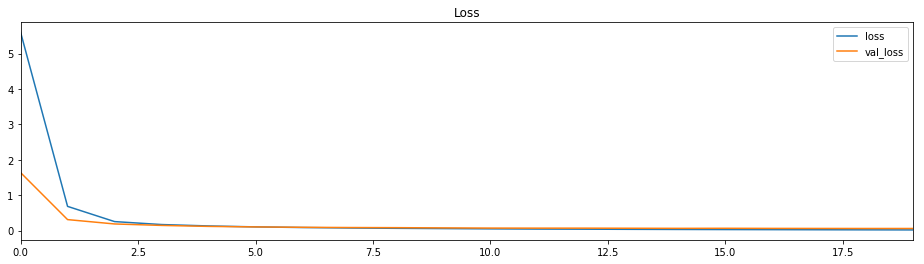

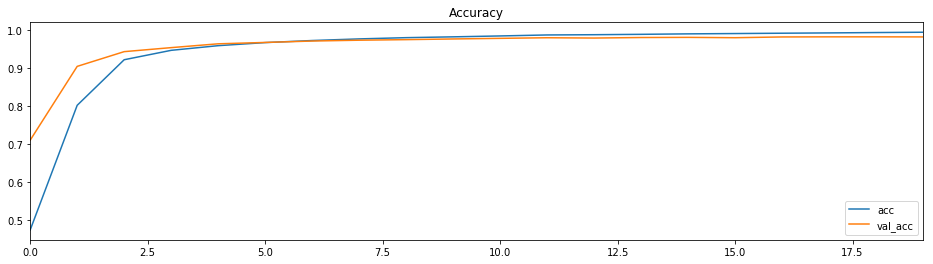

In [12]:
df.plot(y=['loss', 'val_loss'], figsize=(16,4), title='Loss')
df.plot(y=['acc', 'val_acc'], figsize=(16,4), title='Accuracy');

Prediction: 7
Real      : 7


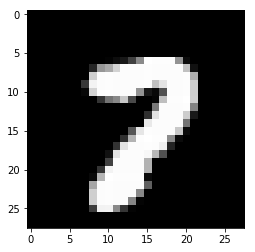

In [19]:
i = np.random.choice(len(x_test))
y = model.predict_classes(x_test[i].reshape(1,28,28,1), verbose=0)[0]
print(f'Prediction: {y}')
print(f'Real      : {y_test[i]}')
plt.imshow(x_test[i].reshape(28,28), cmap='gray')
plt.show()